In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons, make_swiss_roll
from sklearn import preprocessing
from functools import reduce #To use multiple np.kron

import math

import time

In [2]:
directory_arrays = './Saved_arrays/'

In [3]:
def save_arrays_to_file(arrays, variable_names, filename):
    """
    Saves a list of arrays into a dictionary and exports them to a .npz file.

    Parameters:
    - arrays (list of np.ndarray): The list of arrays to save.
    - variable_names (list of str): The corresponding names for the arrays.
    - filename (str): The file name to save the arrays.
    """
    if len(arrays) != len(variable_names):
        raise ValueError("Number of arrays and variable names must match.")

    array_dict = {name: array for name, array in zip(variable_names, arrays)}
    np.savez(filename, **array_dict)
    print(f"Arrays saved to {filename}")

def load_arrays_from_file(filename):
    """
    Loads arrays from a .npz file and returns a dictionary of them.

    Parameters:
    - filename (str): The file name to load the arrays from.

    Returns:
    - dict: A dictionary where keys are variable names and values are arrays.
    """
    loaded_data = np.load(directory_arrays+filename)
    array_dict = {key: loaded_data[key] for key in loaded_data.files}
    print(f"Arrays loaded from {filename}")
    return array_dict

In [4]:
### CHANGE THE NAME

data = load_arrays_from_file("coh-spi-biggest.npz")

Arrays loaded from coh-spi-biggest.npz


In [5]:

data.keys()

dict_keys(['N_qfm_arr', 'param_qfm_arr', 'acc_mean', 'acc_std', 'internal_mean', 'internal_std', 'fidelity_mean', 'fidelity_std'])

In [6]:
N_qfm_arr = np.array(data['N_qfm_arr'])
param_qfm_arr = np.array(data['param_qfm_arr'])
acc_mean = np.array(data['acc_mean'])
acc_std = np.array(data['acc_std'])
internal_mean = np.array(data['internal_mean'])
internal_std = np.array(data['internal_std'])
fidelity_mean = np.array(data['fidelity_mean'])
fidelity_std = np.array(data['fidelity_std'])

In [7]:
np.shape(param_qfm_arr)

(138,)

In [8]:
len(np.arange(10, 31, 5, dtype='int'))

5

In [9]:
#N_qfm_arr = np.arange(1, 41, 1, dtype='int')
#param_qfm_arr = np.arange(1, 70, 0.5)

#N_qfm_arr = np.arange(10, 31, 5, dtype='int')
#param_qfm_arr = np.linspace(1, 40, 80)

For N = 1


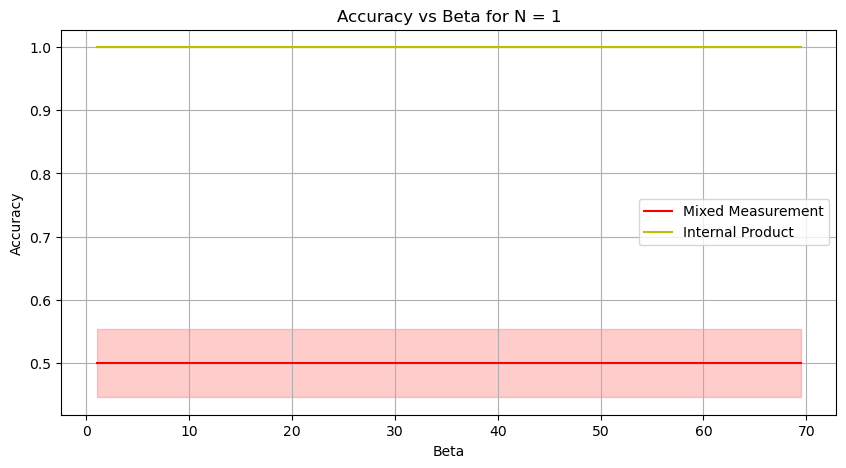

For N = 2


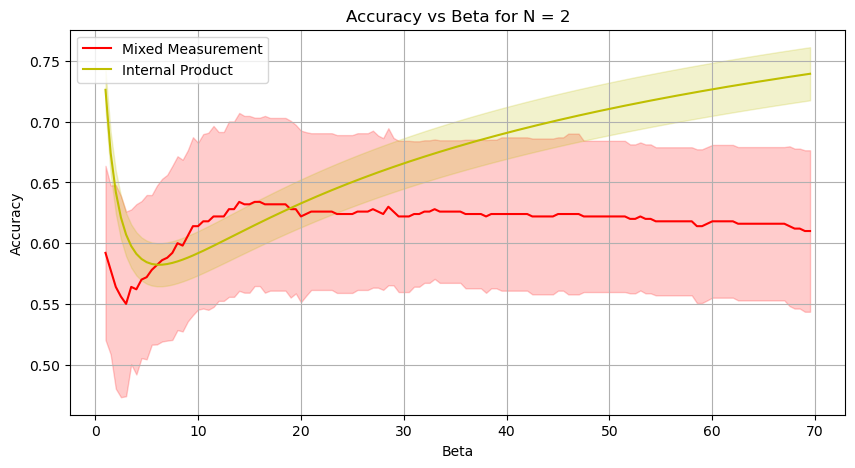

For N = 3


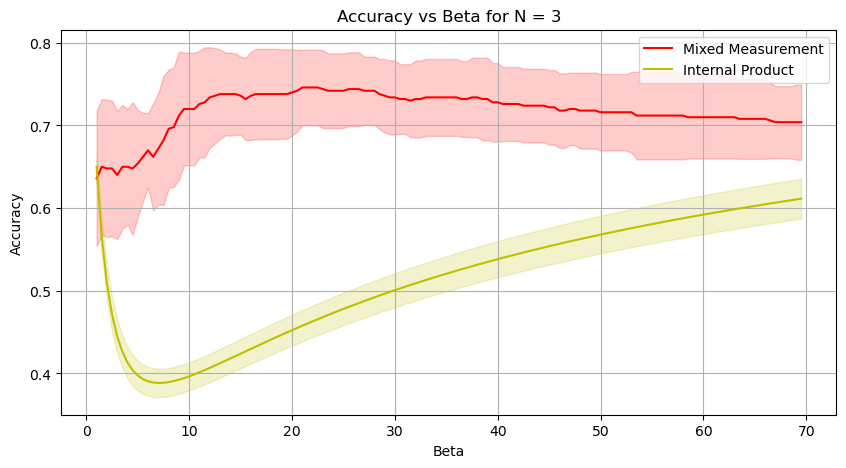

For N = 4


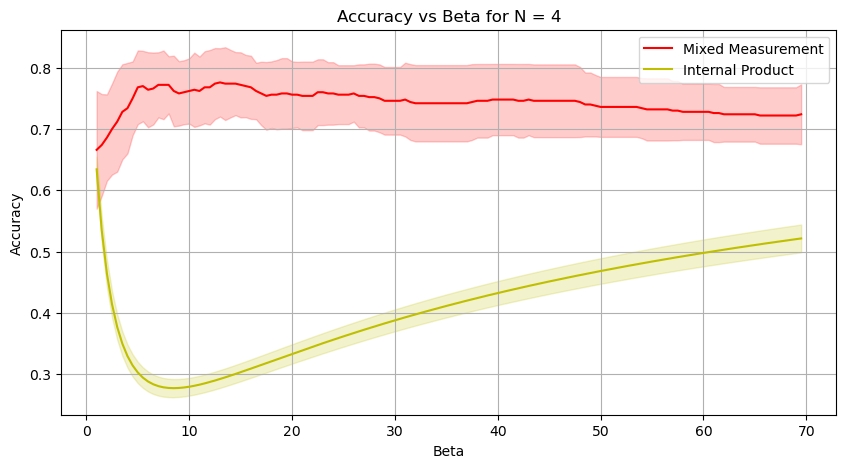

For N = 5


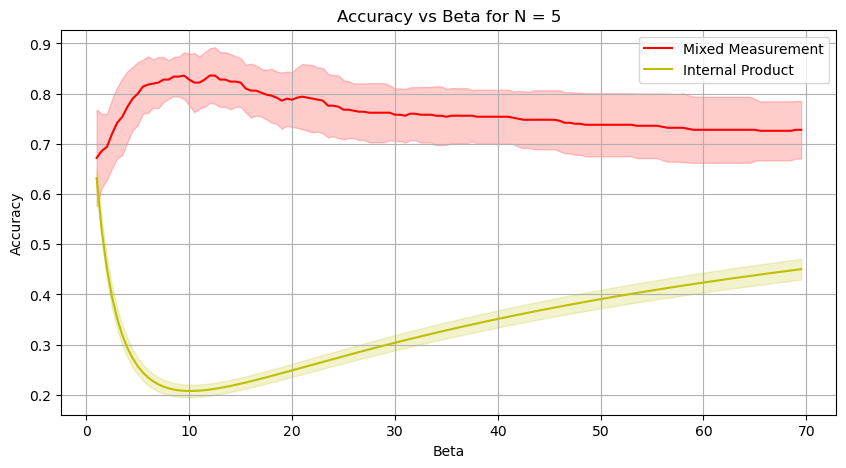

For N = 6


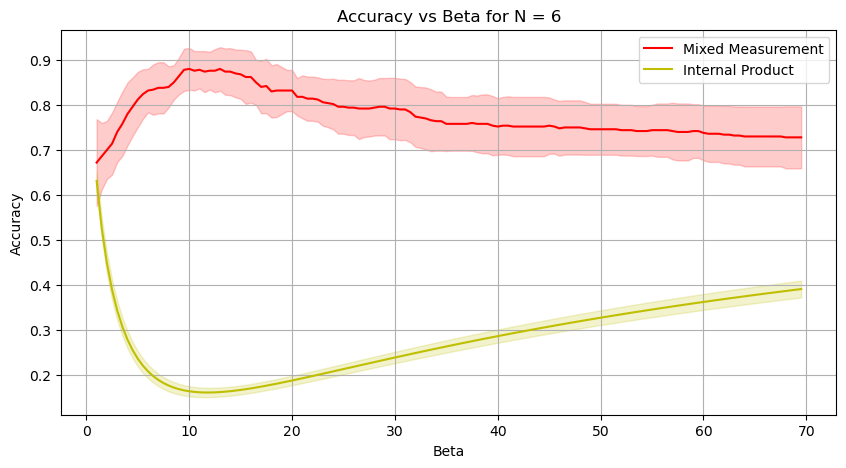

For N = 7


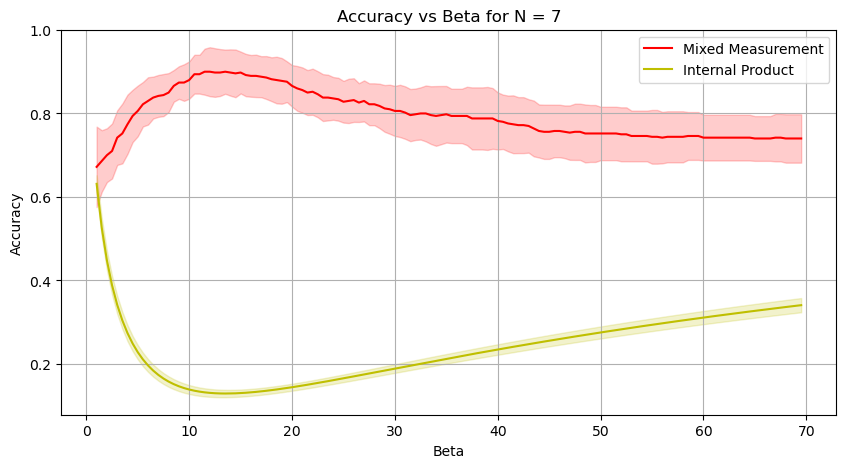

For N = 8


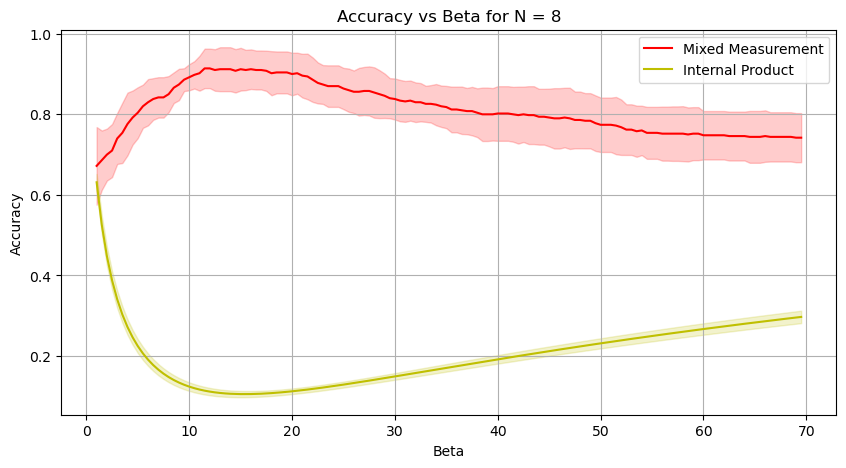

For N = 9


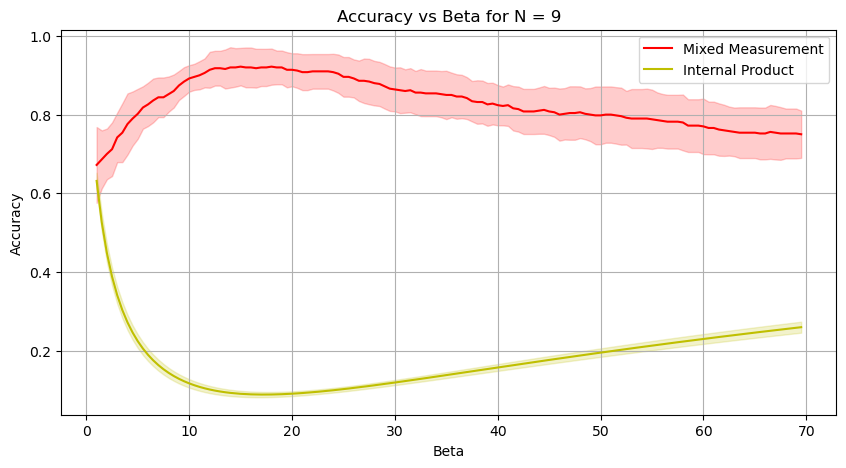

For N = 10


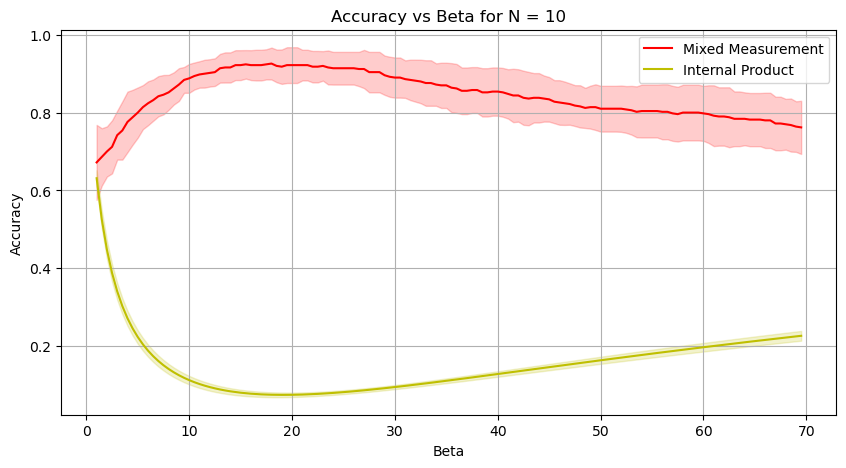

For N = 11


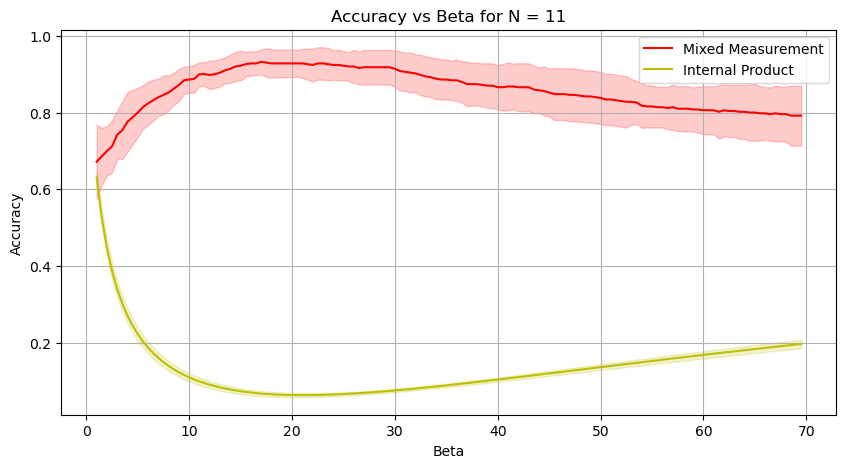

For N = 12


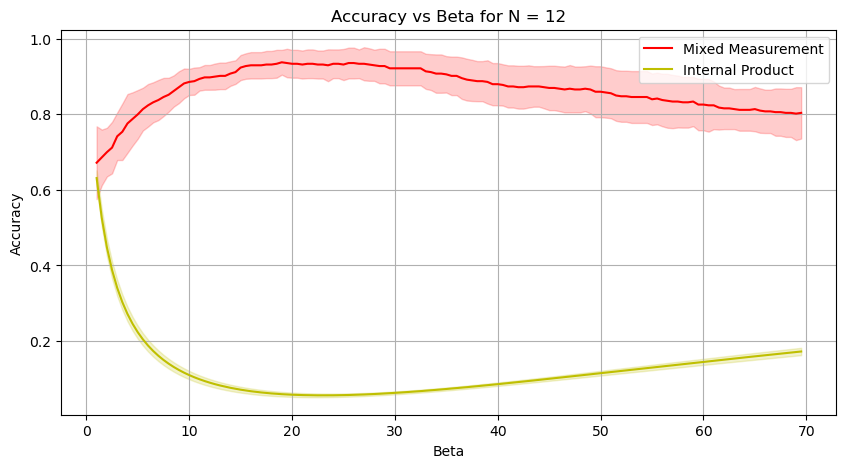

For N = 13


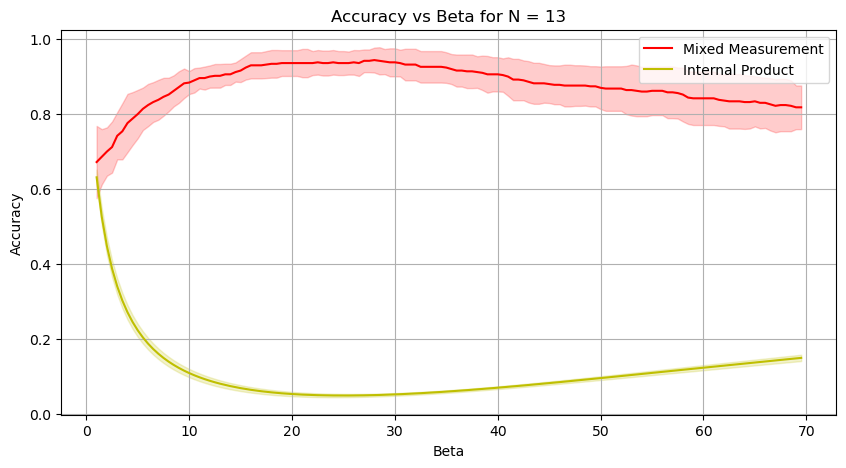

For N = 14


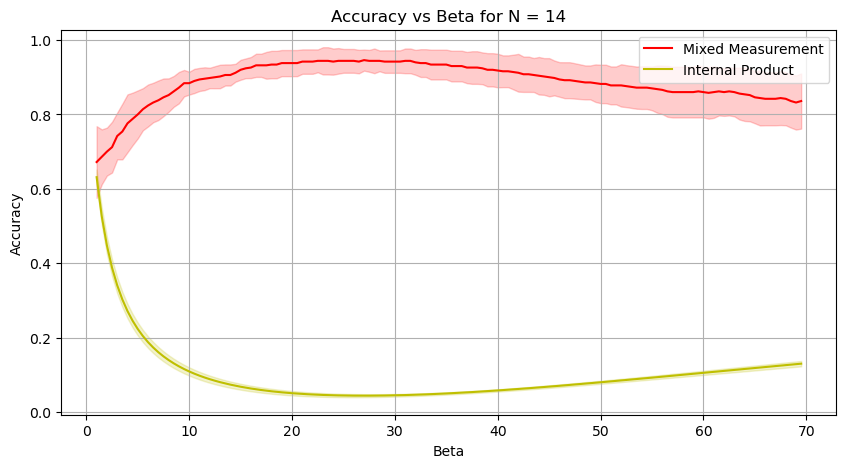

For N = 15


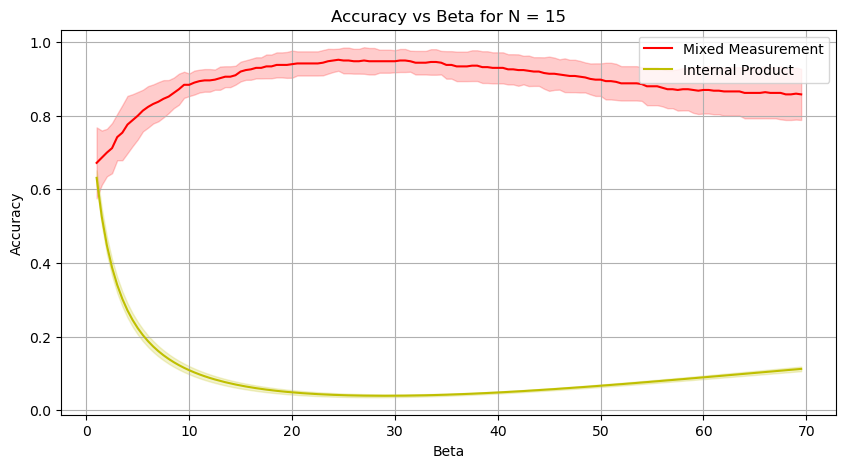

For N = 16


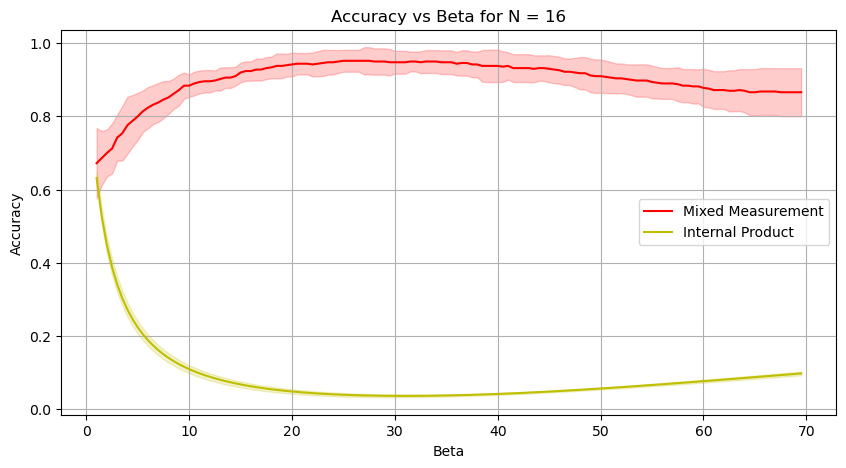

For N = 17


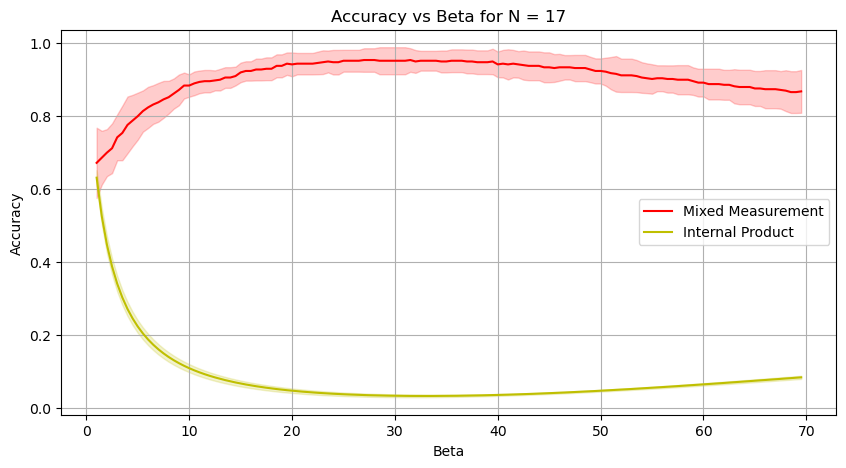

For N = 18


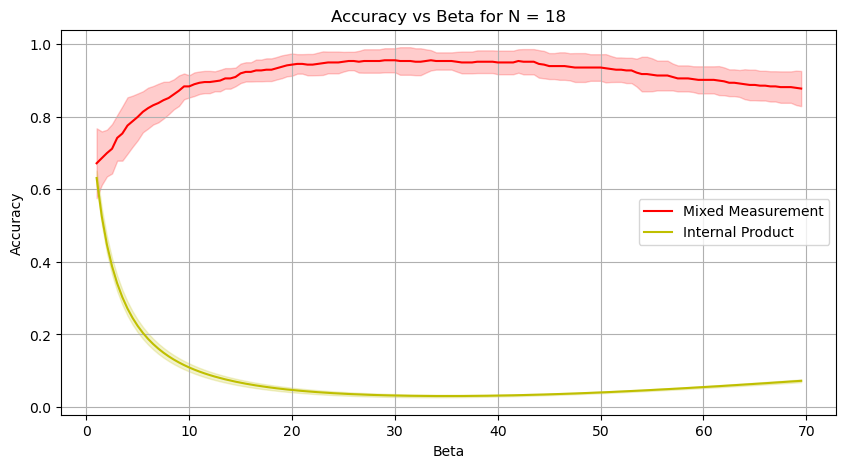

For N = 19


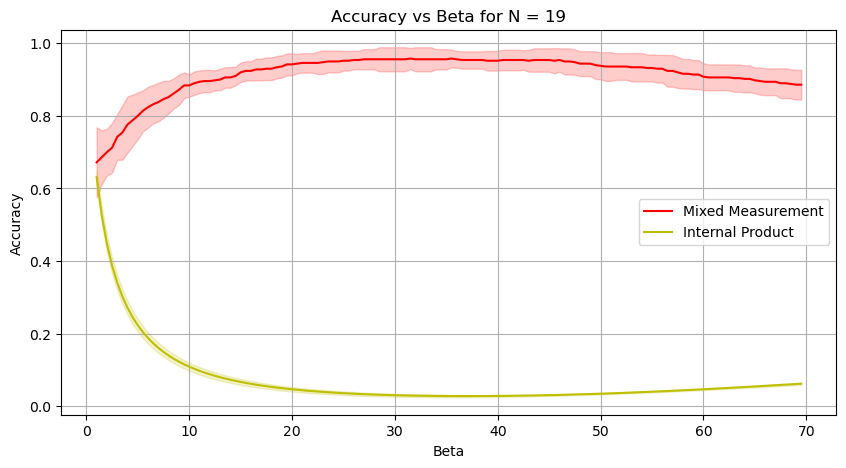

For N = 20


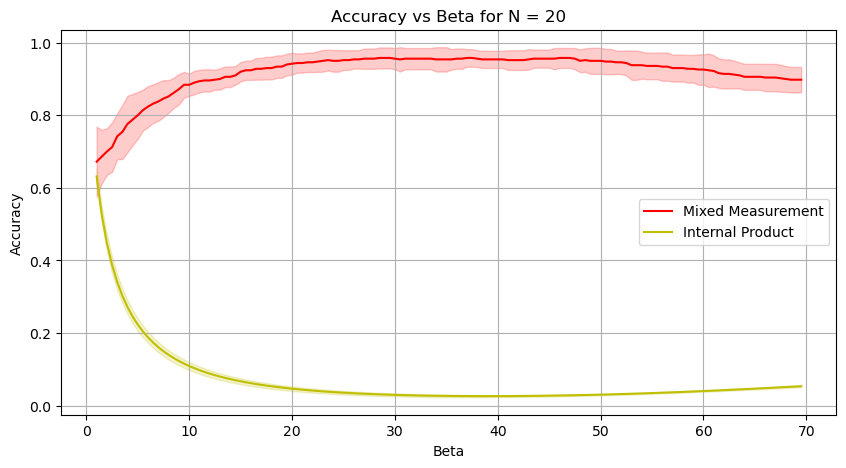

For N = 21


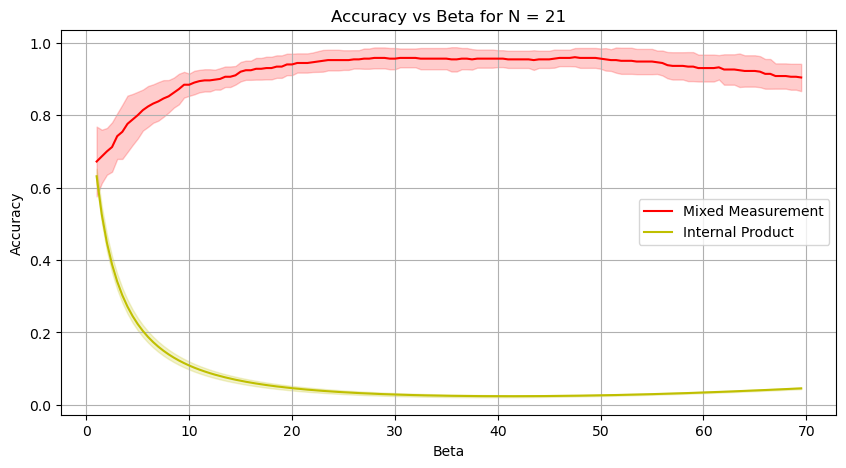

For N = 22


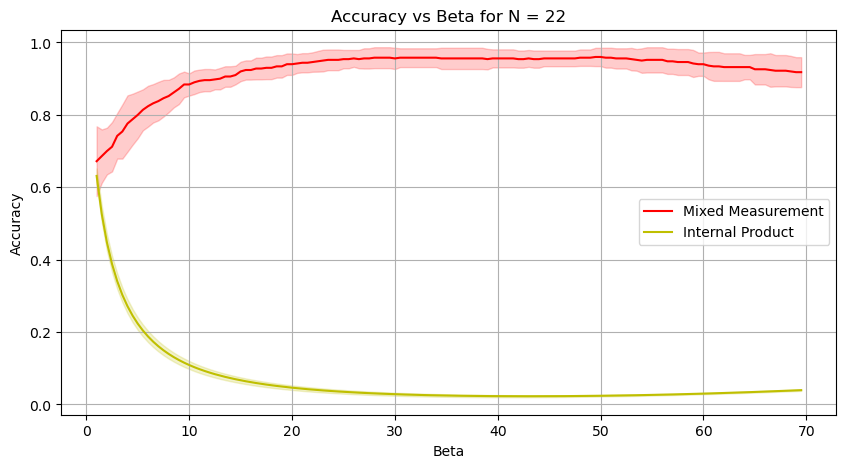

For N = 23


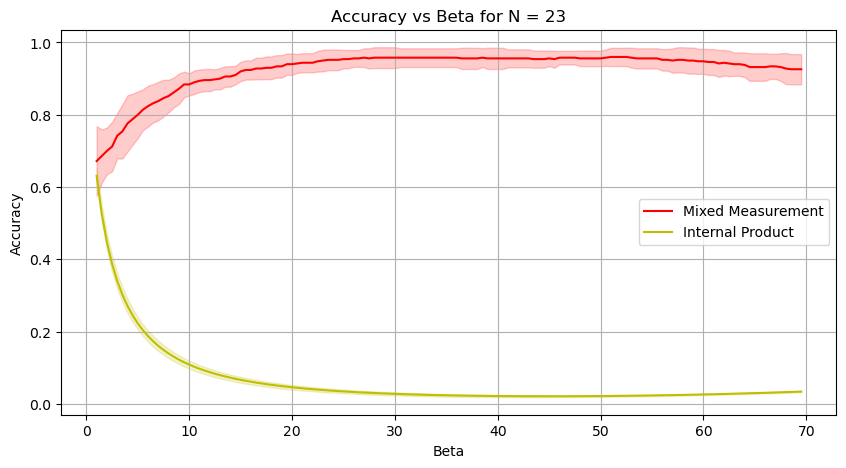

For N = 24


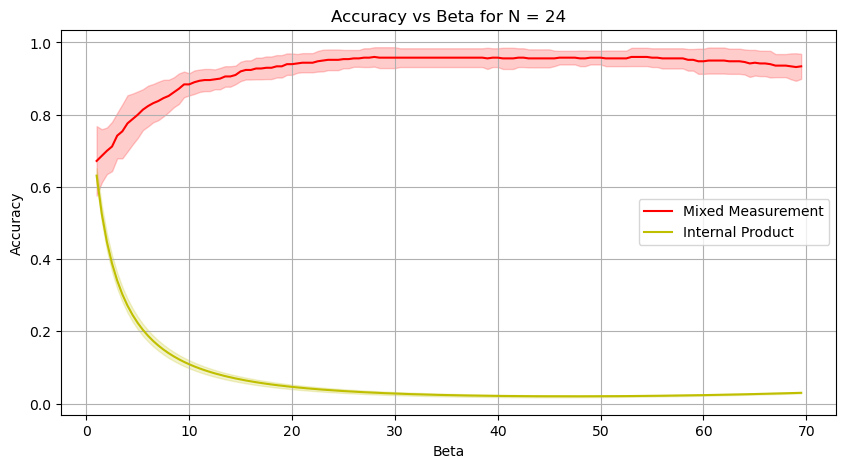

For N = 25


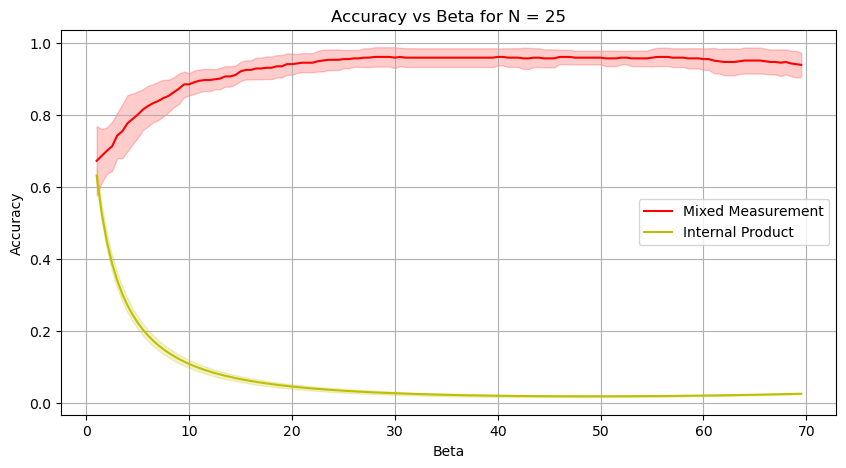

For N = 26


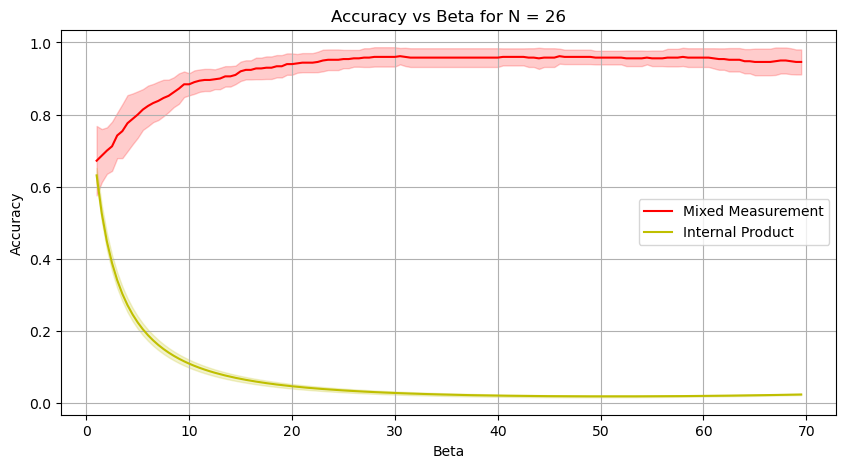

For N = 27


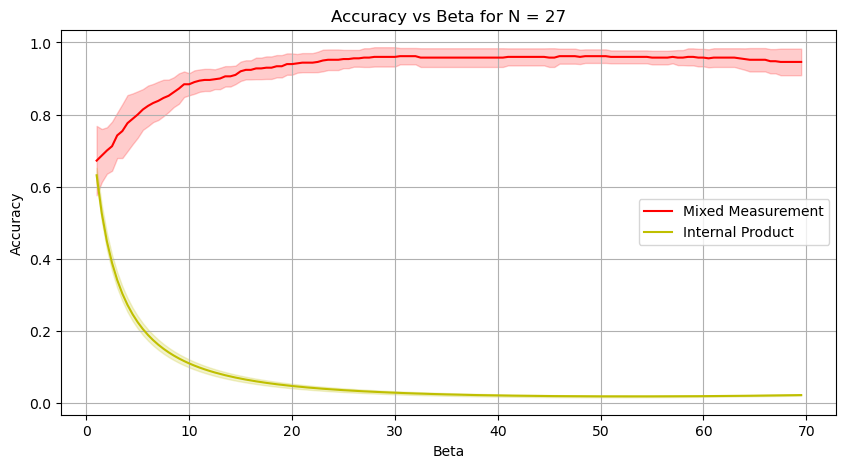

For N = 28


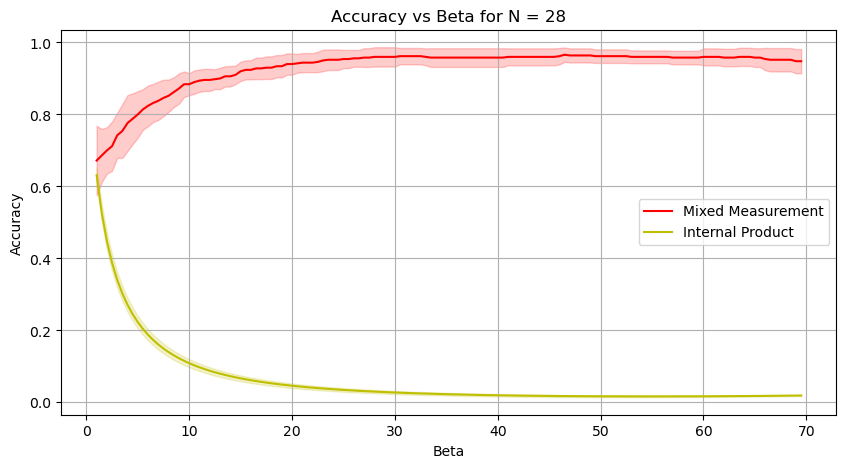

For N = 29


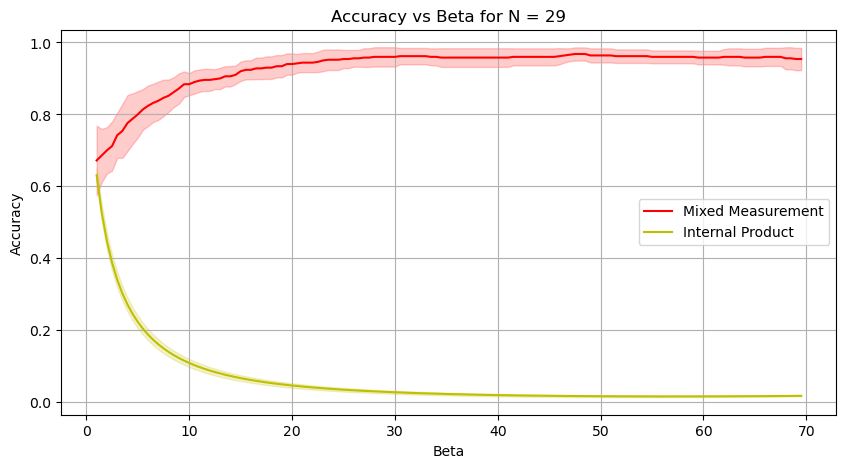

For N = 30


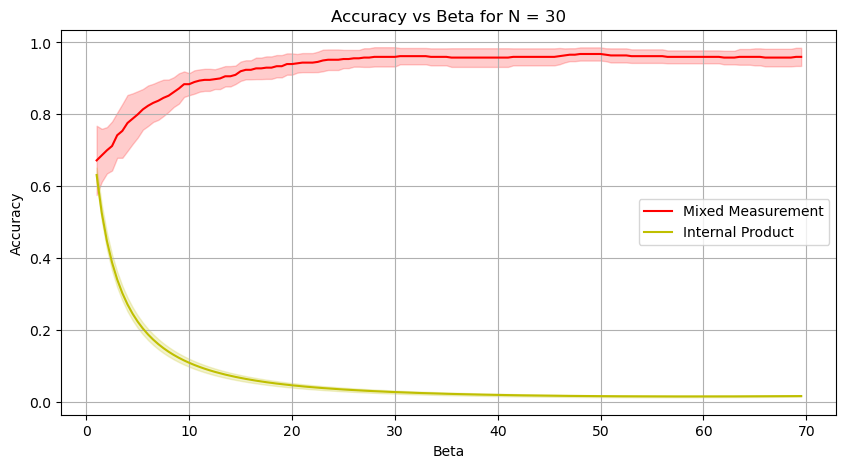

For N = 31


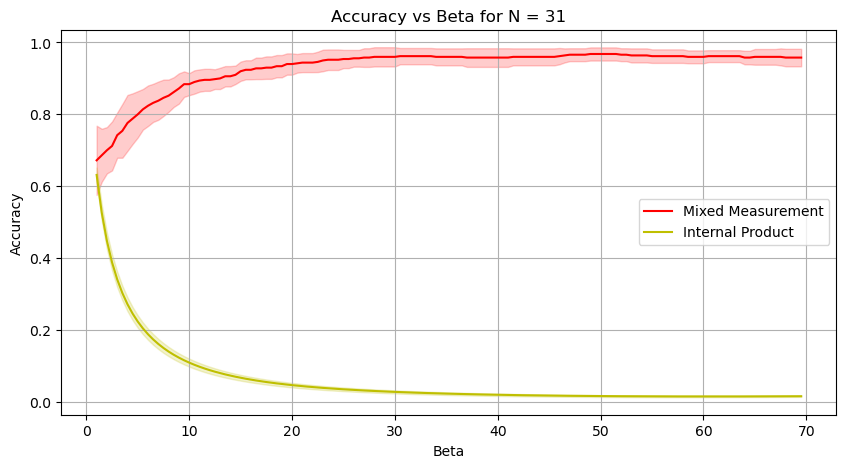

For N = 32


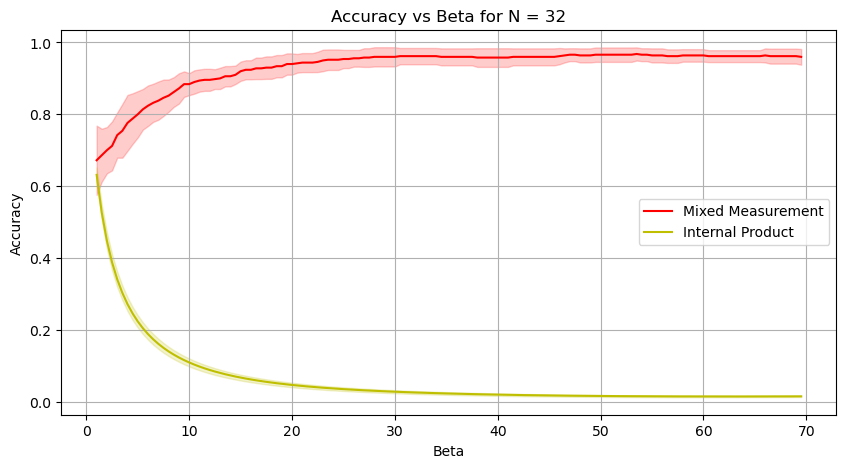

For N = 33


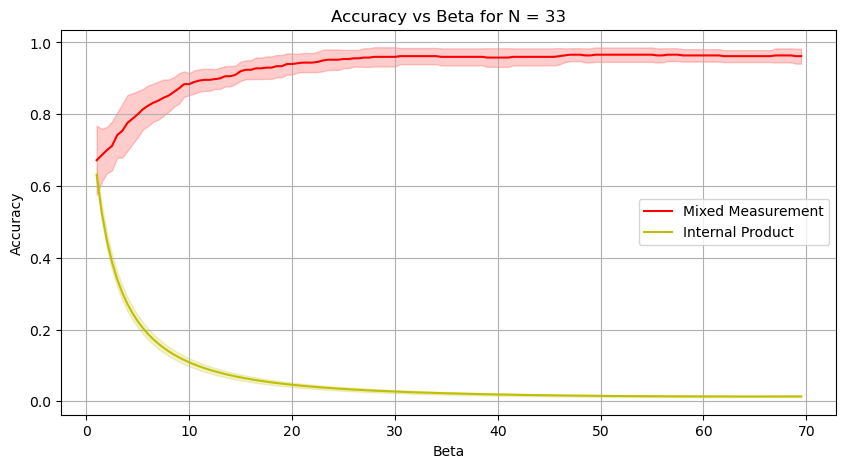

For N = 34


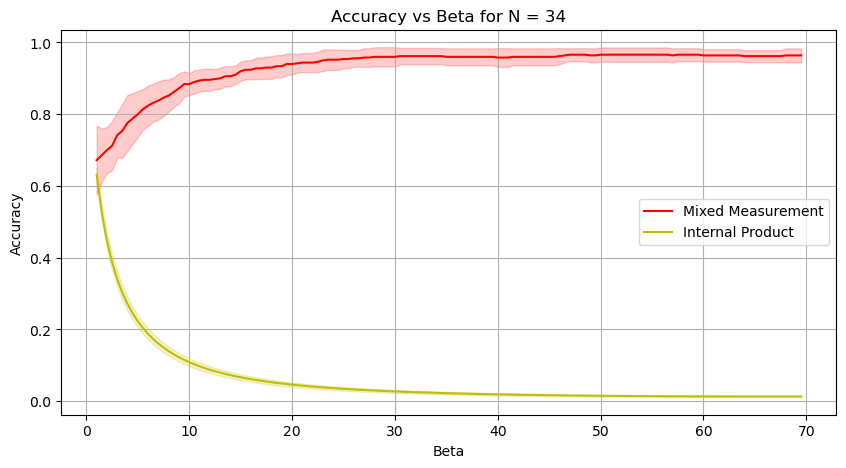

For N = 35


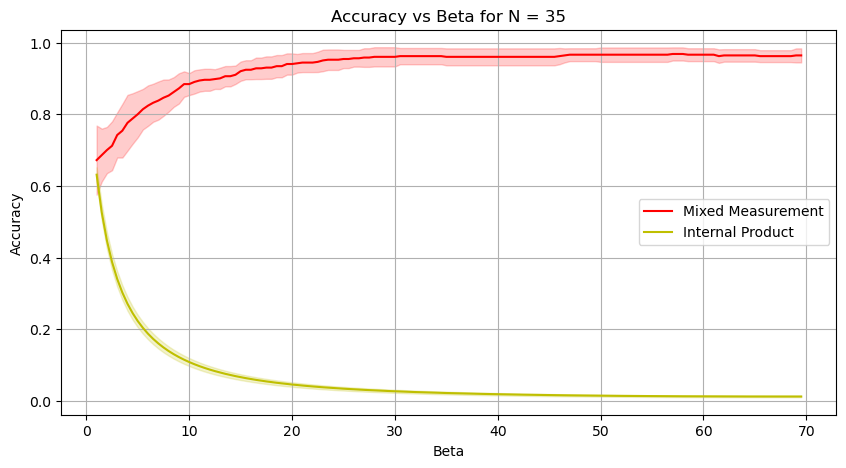

For N = 36


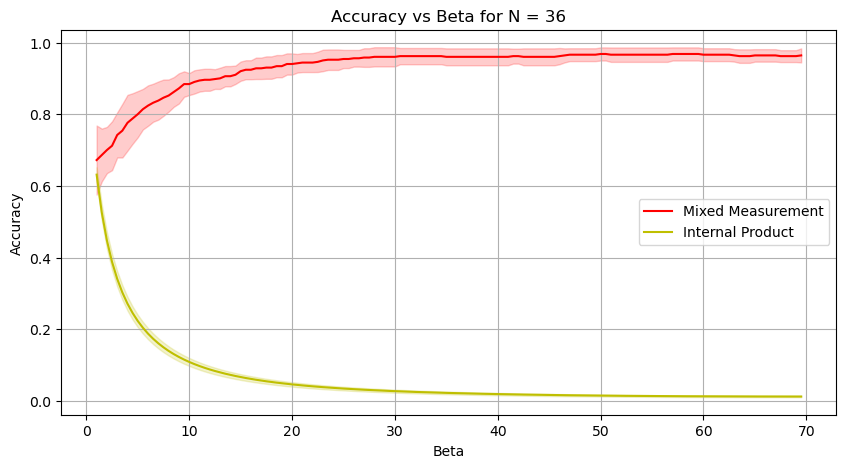

For N = 37


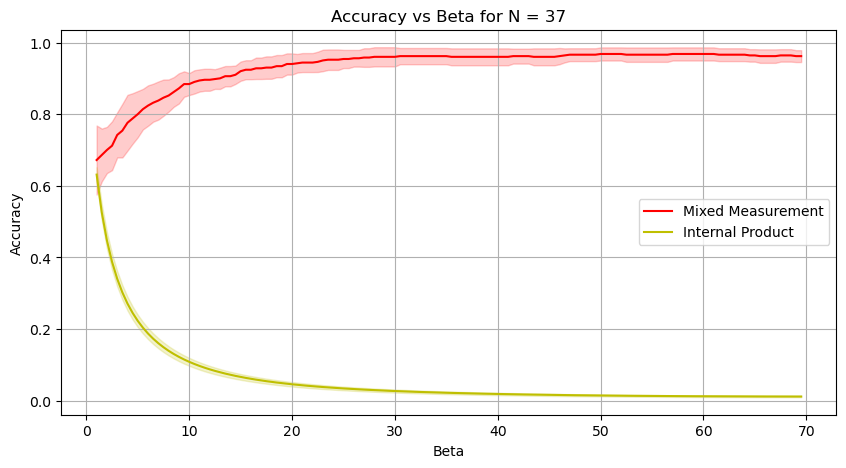

For N = 38


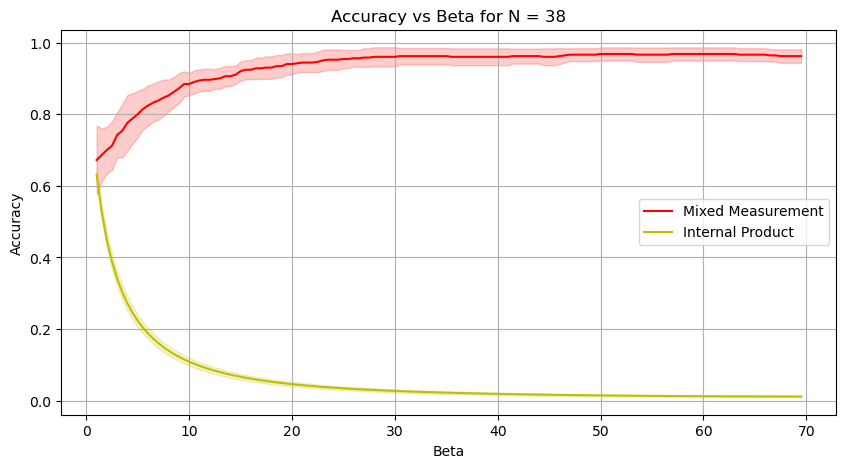

For N = 39


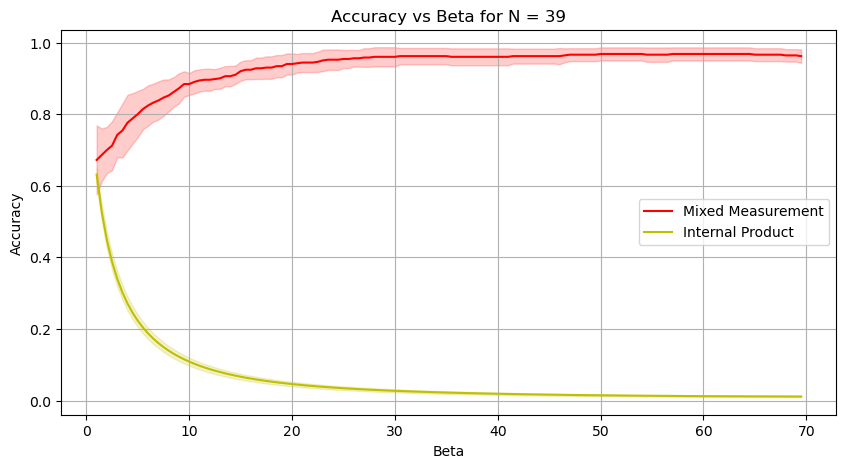

For N = 40


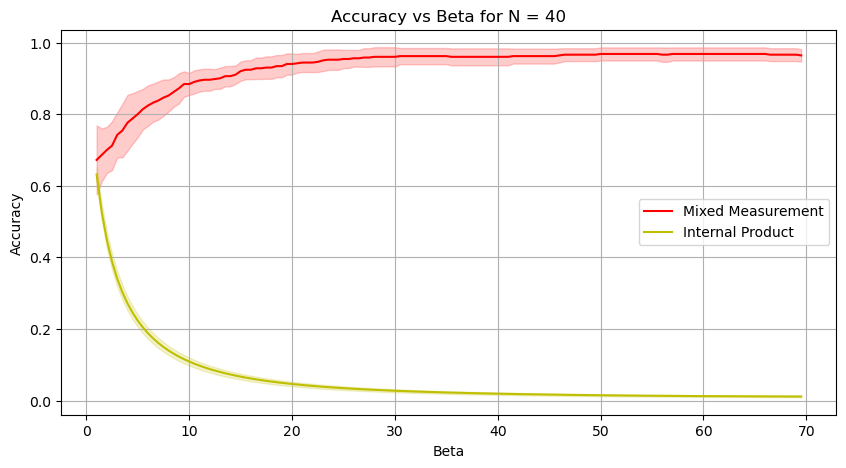

In [10]:
# Plotting Accuracy vs Beta for a fixed N
fixed_N_index = 0
for fixed_N_index in range(len(N_qfm_arr)):
  print(f'For N = {N_qfm_arr[fixed_N_index]}')
  plt.figure(figsize=(10, 5))

  # Plot accuracy for pure measurement
  #plt.plot(param_qfm_arr, acc_mean[fixed_N_index, :, 0], label='Pure Measurement', color='b')
  #plt.fill_between(param_qfm_arr, acc_mean[fixed_N_index, :, 0] - acc_std[fixed_N_index, :, 0],
  #                acc_mean[fixed_N_index, :, 0] + acc_std[fixed_N_index, :, 0], color='b', alpha=0.2)
  # Plot accuracy for mixed measurement
  plt.plot(param_qfm_arr, acc_mean[fixed_N_index, :, 1], label='Mixed Measurement',color='r')
  plt.fill_between(param_qfm_arr, acc_mean[fixed_N_index, :, 1] - acc_std[fixed_N_index, :, 1],
                  acc_mean[fixed_N_index, :, 1] + acc_std[fixed_N_index, :, 1], color='r', alpha=0.2)
  # Plot accuracy for diagonal of mixed measurement
  #plt.plot(param_qfm_arr, acc_mean[fixed_N_index, :, 2], label='Clasical Measurement', color='g')
  #plt.fill_between(param_qfm_arr, acc_mean[fixed_N_index, :, 2] - acc_std[fixed_N_index, :, 2],
  #                acc_mean[fixed_N_index, :, 2] + acc_std[fixed_N_index, :, 2], color='g', alpha=0.2)
  # Plot internal product average
  plt.plot(param_qfm_arr, internal_mean[fixed_N_index, :], label='Internal Product', color='y')
  plt.fill_between(param_qfm_arr, internal_mean[fixed_N_index, :] - internal_std[fixed_N_index, :],
                  internal_mean[fixed_N_index, :] + internal_std[fixed_N_index, :], color='y', alpha=0.2)
  # Plot fidelity average
  #plt.plot(param_qfm_arr, fidelity_mean[fixed_N_index, :], label='Fidelity', color='m')
  #plt.fill_between(param_qfm_arr, fidelity_mean[fixed_N_index, :] - fidelity_std[fixed_N_index, :],
  #                fidelity_mean[fixed_N_index, :] + fidelity_std[fixed_N_index, :], color='m', alpha=0.2)

  plt.title(f'Accuracy vs Beta for N = {N_qfm_arr[fixed_N_index]}')
  plt.xlabel('Beta')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

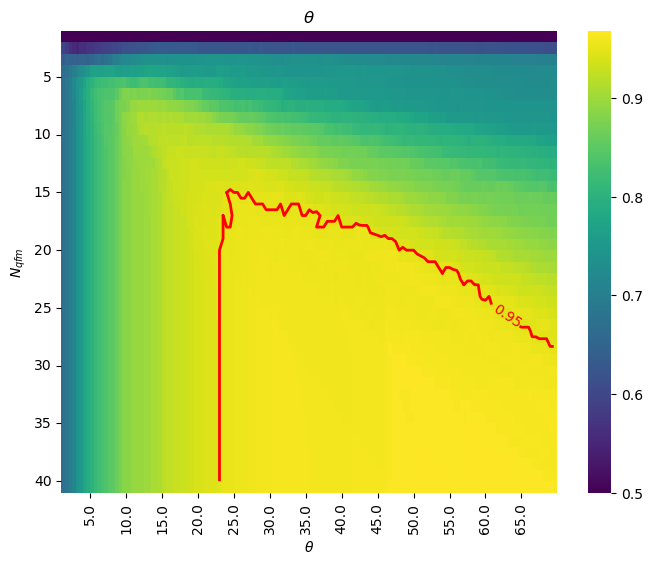

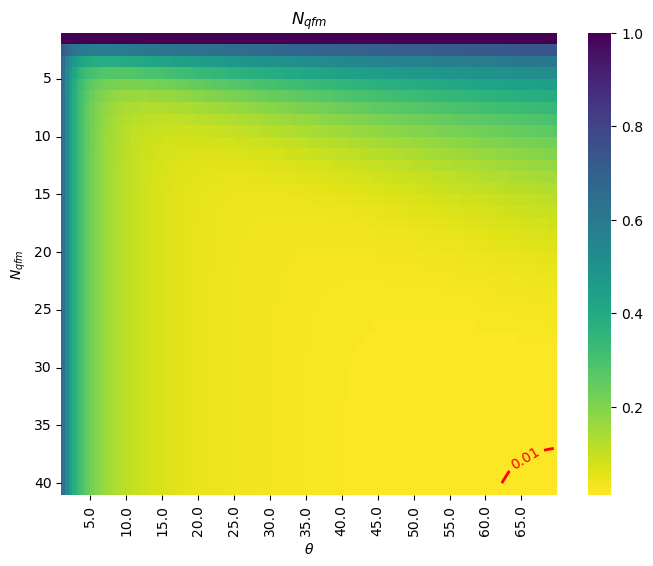

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot heatmap
def plot_heatmap(data, x_labels, y_labels, title, xlabel, ylabel,threshold=0, cmap ="viridis"):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(data, xticklabels=x_labels, yticklabels=y_labels, cmap=cmap)#, annot=True, fmt=".2f")

    # Create a contour line where data reaches the threshold
    X, Y = np.meshgrid(np.arange(len(x_labels)), np.arange(len(y_labels)))  # Meshgrid for contour
    contour = plt.contour(X, Y, data, levels=[threshold], colors="red", linewidths=2)
    plt.clabel(contour, fmt=f"{threshold:.2f}", colors="red")  # Add labels to the contour line


    # Set ticks to show only multiples of 5
    ax.set_xticks([i for i, v in enumerate(x_labels) if v % 5 == 0])
    ax.set_xticklabels([v for v in x_labels if v % 5 == 0])

    ax.set_yticks([i for i, v in enumerate(y_labels) if v % 5 == 0])
    ax.set_yticklabels([v for v in y_labels if v % 5 == 0])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Heatmap for acc_mean[:, :, 1]
plot_heatmap(acc_mean[:, :, 1], param_qfm_arr, N_qfm_arr, r"$\theta$", r"$\theta$", r"$N_{qfm}$",threshold=0.95)

# Heatmap for internal_mean
plot_heatmap(internal_mean, param_qfm_arr, N_qfm_arr, r"$N_{qfm}$", r"$\theta$", r"$N_{qfm}$",threshold=0.012,cmap="viridis_r")


In [33]:
def find_max_points(arr):
    max_value = np.max(arr)  # Find the maximum value
    return np.argwhere(arr == max_value)

def find_min_points(arr):
    min_value = np.min(arr)  # Find the maximum value
    return np.argwhere(arr == min_value)


max_idxs = find_max_points(acc_mean[:,:,1])
min_idxs = find_min_points(internal_mean)

print(max_idxs[0,:])
print(f'the max accuracy is: {acc_mean[max_idxs[0,0],max_idxs[0,1],1]}')
print(f'the min inner prod is {internal_mean[min_idxs[0,0],min_idxs[0,1]]}')

max_in_acc = np.array([N_qfm_arr[max_idxs[:,0]],param_qfm_arr[max_idxs[:,1]]]).T
min_in_int = np.array([N_qfm_arr[min_idxs[:,0]],param_qfm_arr[min_idxs[:,1]]]).T

print(max_in_acc)

[28 93]
the max accuracy is: 0.968
the min inner prod is 0.011250485015640677
[[29.  47.5]
 [29.  48. ]
 [29.  48.5]
 [30.  48. ]
 [30.  48.5]
 [30.  49. ]
 [30.  49.5]
 [30.  50. ]
 [31.  49. ]
 [31.  49.5]
 [31.  50. ]
 [31.  50.5]
 [31.  51. ]
 [31.  51.5]
 [32.  53.5]
 [35.  57. ]
 [35.  57.5]
 [35.  58. ]
 [36.  50. ]
 [36.  50.5]
 [36.  57. ]
 [36.  57.5]
 [36.  58. ]
 [36.  58.5]
 [36.  59. ]
 [36.  59.5]
 [37.  50. ]
 [37.  50.5]
 [37.  51. ]
 [37.  51.5]
 [37.  52. ]
 [37.  57. ]
 [37.  57.5]
 [37.  58. ]
 [37.  58.5]
 [37.  59. ]
 [37.  59.5]
 [37.  60. ]
 [37.  60.5]
 [37.  61. ]
 [38.  50. ]
 [38.  50.5]
 [38.  51. ]
 [38.  51.5]
 [38.  52. ]
 [38.  52.5]
 [38.  53. ]
 [38.  57. ]
 [38.  57.5]
 [38.  58. ]
 [38.  58.5]
 [38.  59. ]
 [38.  59.5]
 [38.  60. ]
 [38.  60.5]
 [38.  61. ]
 [38.  61.5]
 [38.  62. ]
 [38.  62.5]
 [38.  63. ]
 [39.  50. ]
 [39.  50.5]
 [39.  51. ]
 [39.  51.5]
 [39.  52. ]
 [39.  52.5]
 [39.  53. ]
 [39.  53.5]
 [39.  54. ]
 [39.  57. ]
 [39.  57.5]

In [ ]:
"""""### SAVING


# Get the current time as a time struct
current_time = time.localtime()

# Extract individual components
month = current_time.tm_mon  # Month (1-12)
day = current_time.tm_mday   # Day of the month (1-31)
hour = current_time.tm_hour  # Hour (0-23)
minute = current_time.tm_min # Minute (0-59)


arrays = [N_qfm_arr,param_qfm_arr,acc_mean, acc_std, internal_mean, internal_std, fidelity_mean, fidelity_std]
variable_names = ['N_qfm_arr','param_qfm_arr','acc_mean', 'acc_std', 'internal_mean', 'internal_std', 'fidelity_mean', 'fidelity_std']

qfm_name = 'squ'#(quantum_feature_map.__name__)[:3]
dataset_name = 'spi'#(dataset_generator.__name__)[9:12]
print(qfm_name)
print(dataset_name)
filename = qfm_name + '-' + dataset_name + f'-{day}-{month}-{hour}'
filename = directory_arrays + filename

save_arrays_to_file(arrays, variable_names, filename)
"""""

'""### SAVING\n\n\n# Get the current time as a time struct\ncurrent_time = time.localtime()\n\n# Extract individual components\nmonth = current_time.tm_mon  # Month (1-12)\nday = current_time.tm_mday   # Day of the month (1-31)\nhour = current_time.tm_hour  # Hour (0-23)\nminute = current_time.tm_min # Minute (0-59)\n\n\narrays = [N_qfm_arr,param_qfm_arr,acc_mean, acc_std, internal_mean, internal_std, fidelity_mean, fidelity_std]\nvariable_names = [\'N_qfm_arr\',\'param_qfm_arr\',\'acc_mean\', \'acc_std\', \'internal_mean\', \'internal_std\', \'fidelity_mean\', \'fidelity_std\']\n\nqfm_name = \'squ\'#(quantum_feature_map.__name__)[:3]\ndataset_name = \'spi\'#(dataset_generator.__name__)[9:12]\nprint(qfm_name)\nprint(dataset_name)\nfilename = qfm_name + \'-\' + dataset_name + f\'-{day}-{month}-{hour}\'\nfilename = directory_arrays + filename\n\nsave_arrays_to_file(arrays, variable_names, filename)\n'